In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Data Understanding

## Data Loading

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/lailarizzah/Submission-Prediksi-Penyakit-Jantung/refs/heads/main/heart_disease_uci.csv'
heart = pd.read_csv(url)
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Dari output terlihat bahwa:

Terdapat 8 kolom dengan tipe object, yaitu: sex, dataset, cp, fbs, restecg, exang, slope, dan thal. Kolom ini merupakan categorical features (fitur non-numerik).
Terdapat 5 kolom numerik dengan tipe data float64 yaitu: trestbps, chol, thalch, oldpeak, dan ca. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
Terdapat 3 kolom numerik dengan tipe data int64, yaitu: id, age, dan num. Kolom 'num' merupakan target fitur.

In [4]:
# Mengecek missing values
heart.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


Ada perbedaan jumlah data pada kolom *trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca,* dan *thal*. Hal ini menunjukkan adanya missing values pada kolom tersebut.

In [5]:
# Mengecek data duplikat
print("Jumlah duplikasi: ", heart.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
# Mengecek inacurate value
heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama.
- Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua atau median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

### Distribusi Variabel Numerik

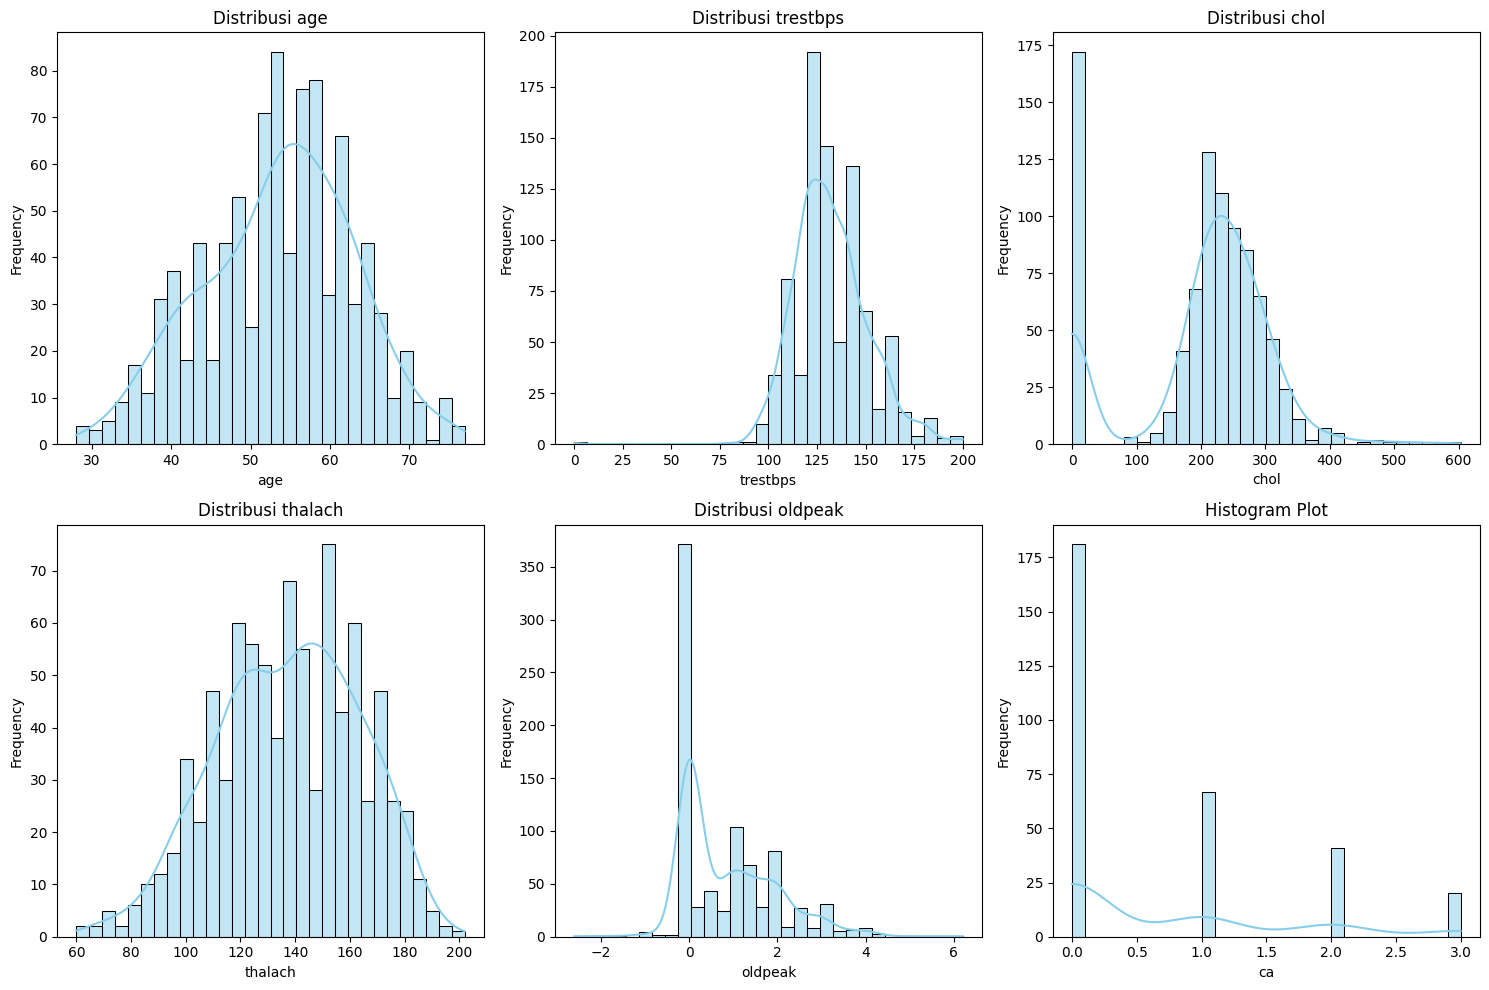

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ganti thalch ke thalach jika perlu
heart.rename(columns={'thalch': 'thalach'}, inplace=True)

# Pilih kolom numerik
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(heart[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.title("Histogram Plot")
plt.savefig("histogram_plot.png", bbox_inches='tight')  # simpan dulu
plt.show()

### Distribusi Variabel Kategorik

<ipython-input-8-b67949a9eb88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart, x=col, palette='pastel')
<ipython-input-8-b67949a9eb88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart, x=col, palette='pastel')
<ipython-input-8-b67949a9eb88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart, x=col, palette='pastel')
<ipython-input-8-b67949a9eb88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

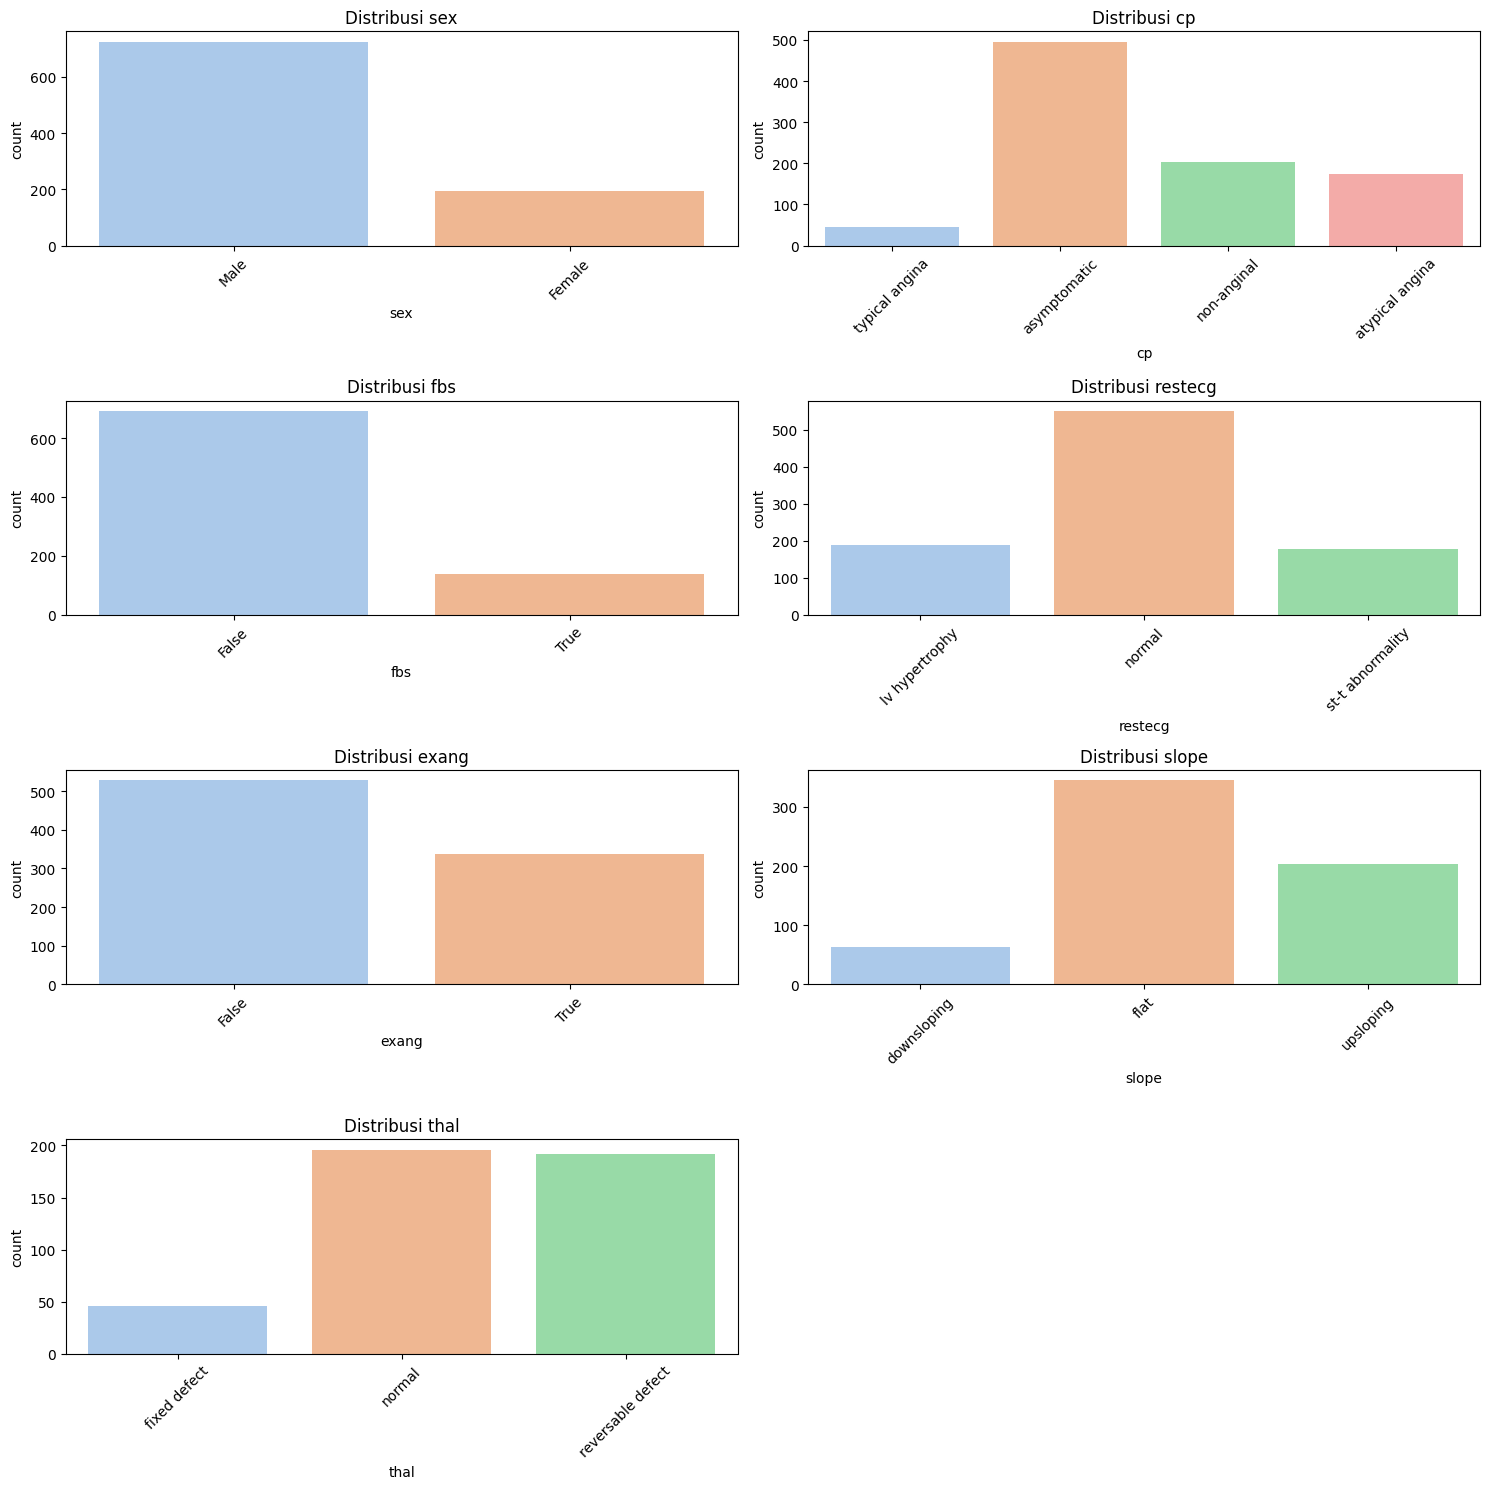

In [8]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=heart, x=col, palette='pastel')
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("distribusi_variabel_kategorik.png", bbox_inches='tight')  # simpan dulu
plt.show()


### Distribusi Target

<ipython-input-9-460eb132ed24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart, x='target', palette='Set2')


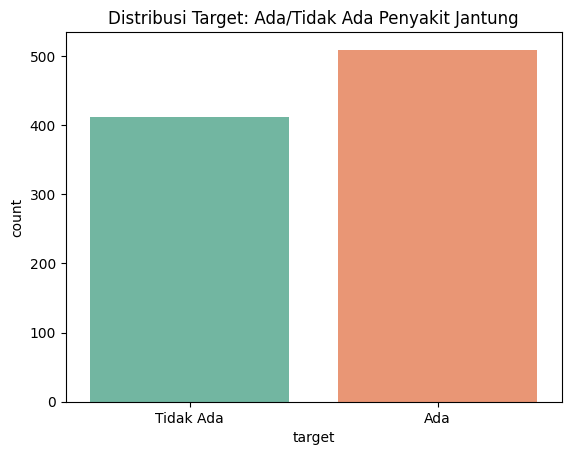

In [9]:
heart['target'] = heart['num'].apply(lambda x: 1 if x > 0 else 0)
sns.countplot(data=heart, x='target', palette='Set2')
plt.title('Distribusi Target: Ada/Tidak Ada Penyakit Jantung')
plt.xticks([0, 1], ['Tidak Ada', 'Ada'])
plt.savefig("distribusi_target.png", bbox_inches='tight')  # simpan dulu
plt.show()


Berdasarkan visualisasi

### Korelasi Antara Fitur dengan Target

num         0.783387
ca          0.455599
oldpeak     0.385528
id          0.356086
age         0.282700
trestbps    0.106233
chol       -0.230583
thalach    -0.394503
Name: target, dtype: float64


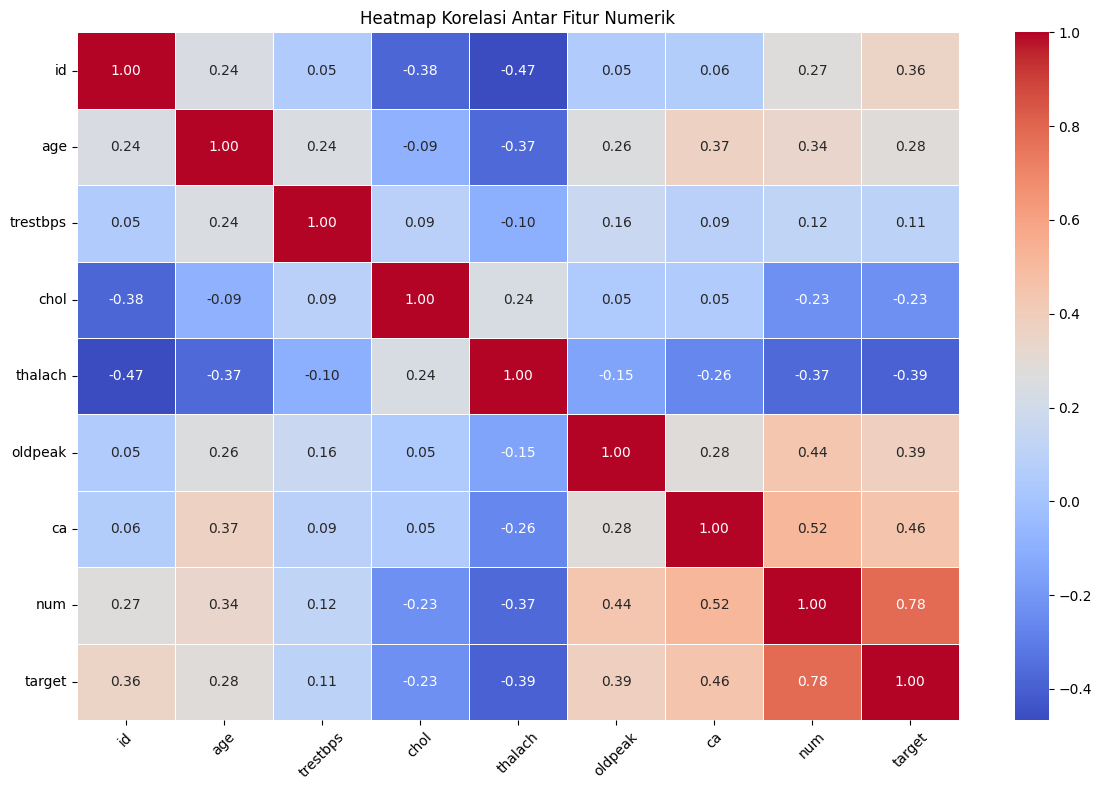

In [10]:
# Ubah target jadi biner
heart['target'] = heart['num'].apply(lambda x: 1 if x > 0 else 0)

import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
numerical_cols = heart.select_dtypes(include=['int64', 'float64']).columns

# Korelasi
correlation = heart[numerical_cols].corr()

# Korelasi terhadap target
target_corr = correlation['target'].drop('target').sort_values(ascending=False)

# Tampilkan hasil
print(target_corr)

# Korelasi antar semua fitur numerik
# corr_matrix = numerical_cols # This was the incorrect line
corr_matrix = correlation # Assign the actual correlation matrix

# Visualisasi heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("korelasi_fitur_target.png", bbox_inches='tight')  # simpan dulu
plt.show()

# Data Preparation

## Mengatasi Missing Values

Berikut beberapa penanganan missing values pada data ini:
1. Fitur numerik seperti trestbps, chol, thalach, dan oldpeak diimputasi menggunakan nilai median.
2. Fitur kategorikal seperti fbs, restecg, exang, slope, dan thal diimputasi menggunakan nilai modus.
3. Fitur 'ca' dihapus karena memiliki terlalu banyak missing value.

In [11]:
# Imputasi median (fitur numerik) menggunakan fillna pada DataFrame
# Menggunakan dictionary mapping column names to their fill values
heart.fillna({'trestbps': heart['trestbps'].median(),
              'chol': heart['chol'].median(),
              'thalach': heart['thalach'].median(),
              'oldpeak': heart['oldpeak'].median()}, inplace=True)

# Imputasi modus (fitur kategorikal)
for col in ['fbs', 'restecg', 'exang', 'slope', 'thal']:
    # Cek apakah kolom tersebut ada sebelum imputasi (optional, tapi bagus)
    if col in heart.columns:
        # Menggunakan penugasan langsung untuk menghindari warning
        heart[col] = heart[col].fillna(heart[col].mode()[0])

# Drop kolom ca karena missing value terlalu banyak
# Cek apakah kolom 'ca' ada sebelum di-drop untuk menghindari KeyError
if 'ca' in heart.columns:
    heart.drop(columns=['ca'], inplace=True)

# Mengecek missing values (output ini akan tetap muncul kecuali diakhiri dengan ; )
heart.isna().sum()

<ipython-input-11-6b4e6ddc9fd4>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart[col] = heart[col].fillna(heart[col].mode()[0])


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0


## Encoding Fitur Kategorik

Encoding dilakukan menggunakan one-hot encoding untuk fitur kategorikal seperti sex, cp, fbs, restecg, exang, slope, thal, dan dataset.

Hal ini penting karena sebagian besar algoritma machine learning membutuhkan data numerik sebagai input.

In [17]:
# Add categorical encoding here
# Identify categorical columns to encode
categorical_cols_to_encode = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset'] # Added 'dataset' as it is an object type

# Perform one-hot encoding
heart_encoded = pd.get_dummies(heart, columns=categorical_cols_to_encode, drop_first=True)

# Convert boolean columns created by get_dummies to integer type (1s and 0s)
bool_cols = heart_encoded.select_dtypes(include='bool').columns
heart_encoded[bool_cols] = heart_encoded[bool_cols].astype(int)

heart_encoded.head()

,id,age,trestbps,chol,thalach,oldpeak,num,target,sex_Male,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1,63,145.0,233.0,150.0,2.3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,67,160.0,286.0,108.0,1.5,2,1,1,0,...,0,0,1,1,0,1,0,0,0,0
2,3,67,120.0,229.0,129.0,2.6,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0
3,4,37,130.0,250.0,187.0,3.5,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,5,41,130.0,204.0,172.0,1.4,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


## Standarisasi

Standarisasi ini dilakukan untuk memastikan skala fitur seragam dan mempercepat proses pelatihan model. Fitur numerik seperti *age*, *trestbps*, *chol*, *thalach*, dan *oldpeak* dinormalisasi menggunakan StandardScaler.



In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_encoded[numerical_cols] = scaler.fit_transform(heart_encoded[numerical_cols])
heart_encoded[numerical_cols].head()

,age,trestbps,chol,thalach,oldpeak
0,1.007386,0.705176,0.303643,0.489727,1.368109
1,1.432034,1.518569,0.789967,-1.181478,0.611589
2,1.432034,-0.650479,0.266939,-0.345875,1.651804
3,-1.752828,-0.108217,0.459634,1.961979,2.502889
4,-1.328180,-0.108217,0.037541,1.365120,0.517024


## Data Spliting

Dataset dibagi menjadi data latih (80%) dan data uji (20%) menggunakan fungsi train_test_split.

In [21]:
# Pisahkan fitur dan target
# Remove 'dataset' from the list of columns to drop since it was one-hot encoded
X = heart_encoded.drop(['target', 'num', 'id'], axis=1)
y = heart_encoded['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

Tiga model machine learning digunakan untuk memprediksi apakah seseorang berisiko terkena penyakit jantung adalah:




1. K-Nearest Neighbors (KNN):

  Mengklasifikasikan berdasarkan kedekatan dengan data tetangga terdekat. Model KNN dibangun dengan parameter default n_neighbors=5.

2. Random Forest:

  Kombinasi dari banyak decision tree, memberikan hasil yang lebih stabil dan minim overfitting. Model Random Forest dibangun dengan n_estimators=100.

3. XGBoost:

  Metode boosting yang sangat powerful dan efisien dalam menangani dataset kompleks. Model XGBoost dibangun dengan parameter dasar, yaitu *eval_metric='logloss'* dan *use_label_encoder=False*

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===================
# 1. K-NEAREST NEIGHBOR
# ===================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbor")
print(classification_report(y_test, y_pred_knn))
print("Akurasi:", round(accuracy_score(y_test, y_pred_knn), 3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("-" * 40)

# ===================
# 2. RANDOM FOREST
# ===================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("-" * 40)

# ===================
# 3. XGBOOST (Boosting)
# ===================
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("Akurasi:", round(accuracy_score(y_test, y_pred_xgb), 3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("-" * 40)


K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.61      0.67      0.64        75
           1       0.75      0.71      0.73       109

    accuracy                           0.69       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.70      0.69      0.69       184

Akurasi: 0.69
Confusion Matrix:
[[50 25]
 [32 77]]
----------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        75
           1       0.90      0.89      0.89       109

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

Akurasi: 0.875
Confusion Matrix:
[[64 11]
 [12 97]]
----------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:41:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        75
           1       0.89      0.87      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184

Akurasi: 0.859
Confusion Matrix:
[[63 12]
 [14 95]]
----------------------------------------


In [27]:
%%writefile requirements.txt
pandas~=2.2
numpy~=1.26
scikit-learn~=1.4
xgboost~=2.0
matplotlib~=3.8
seaborn~=0.13

Writing requirements.txt
